# Very quick presentation of Theano for neural nets

**Theano** is a compiler for mathematical expressions written in Theano. Devise any mathematical expression in the syntax of the well-established core numerics package **numpy**, and Theano will create C-code to evaluate this expression and compile it. It is also possible to generate cuda-code for GPU by simply changing a flag. Of great interest is also the fact that gradients for any scalar function can be calculated automatically, making gradient errors in the construction and training of neural networks a thing of the past.

### Structure of this notebook
- a micro-presentation of numpy
- a micro-introduction to Theano
- a logistic regression with Theano
- an XOR network with Theano
- a multi-layer perceptron with Theano

### Preamble
At the beginning of an IPython notebook, we try to do all the necessary imports

In [1]:
import os
os.environ['THEANO_FLAGS']="device='cpu'"

import numpy as np
import theano
import theano.tensor as T

print theano.config.device

%matplotlib inline
import matplotlib.pyplot as plt

cpu


### Numpy

Numpy is the core numerics package in Python. It is centered around array processing exactly like matlab, and provides a very user-friendly front-end to highly optimized numerical libraries.

In [2]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [3]:
a = np.zeros(5)
a[0] = 1
a

array([ 1.,  0.,  0.,  0.,  0.])

In [4]:
a[1] = 2
a

array([ 1.,  2.,  0.,  0.,  0.])

In [5]:
a[2:4] = 5

In [6]:
a

array([ 1.,  2.,  5.,  5.,  0.])

In [7]:
a[-1] = 10

In [8]:
a

array([  1.,   2.,   5.,   5.,  10.])

In [9]:
a.shape

(5,)

In [10]:
b = np.ones([3, 4])
b

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [11]:
b.shape

(3, 4)

In [12]:
b[0]

array([ 1.,  1.,  1.,  1.])

In [13]:
b[0] = 2
b

array([[ 2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [14]:
b[:, 0]

array([ 2.,  1.,  1.])

In [15]:
b[:, 0] = 5

In [16]:
b

array([[ 5.,  2.,  2.,  2.],
       [ 5.,  1.,  1.,  1.],
       [ 5.,  1.,  1.,  1.]])

In [17]:
b[-1, -1] = 10
b

array([[  5.,   2.,   2.,   2.],
       [  5.,   1.,   1.,   1.],
       [  5.,   1.,   1.,  10.]])

In [18]:
b.ravel()

array([  5.,   2.,   2.,   2.,   5.,   1.,   1.,   1.,   5.,   1.,   1.,
        10.])

In [19]:
np.arange(30)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [20]:
np.arange(30).reshape(5, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

Arrays are just lots of numbers placed next to each other in memory. Numpy remembers the shape they are supposed to have and presents it to us and the algorithms as vectors or matrices or higher-dimensional arrays.

Arrays are so general, they can serve many many purposes:

#### Coordinates

In [21]:
coords = np.array([[0, 0], [1, 0], [1, 2], [0, 1], [0, 0]]).T
print(coords)

[[0 1 1 0 0]
 [0 0 2 1 0]]


[-1, 10, -1, 10]

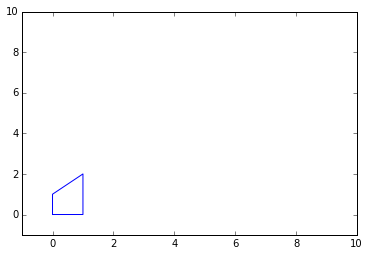

In [22]:
plt.plot(coords[0], coords[1])
plt.axis([-1, 10, -1, 10])

#### shift vectors

[-1, 10, -1, 10]

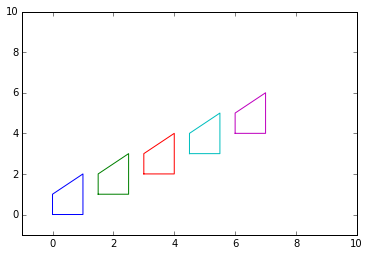

In [23]:
translation = np.array([[1.5], [1]])
for i in range(5):
    shifted = coords + translation * i
    plt.plot(shifted[0], shifted[1])
plt.axis([-1, 10, -1, 10])

#### Matrix multiplications (linear operations), such as rotations

array([[ 0.93969262, -0.34202014],
       [ 0.34202014,  0.93969262]])

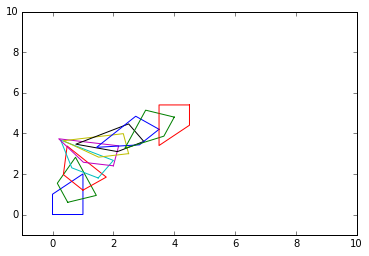

In [25]:
angle = 20. * np.pi / 180
translation = np.array([[.5], [.6]])
rot = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
rotation = np.eye(2)
for i in range(0, 10):
    rotated = rotation.dot(coords)
    shifted = rotated + i * translation
    rotation = rotation.dot(rot)
    plt.plot(shifted[0], shifted[1])

#plt.axis('square')
plt.axis([-1, 10, -1, 10])
rot

#### Images
Arrays of intensity values are the standard way of representing images

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [27]:
(digits.images[0] > 0).astype(int)

array([[0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0]])

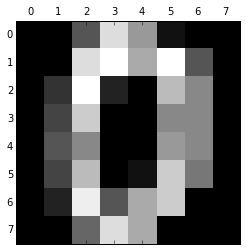

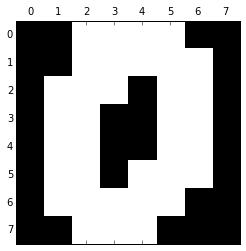

In [29]:
plt.matshow(digits.images[0])
plt.gray()
plt.matshow(digits.images[0] > 0)
plt.gray()

### Machine Learning: Classification problems

An important subcategory of machine learning problems is the classification problem: The task is to determine which category a given sample belongs to. The range of examples for this type of problem is vast. Here we will look at the classification of digits from 0 to 9. But before that, let's take a look at an even simpler problem: 2D point clouds

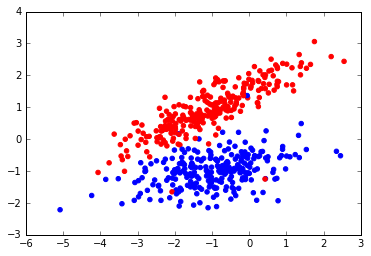

In [15]:
from sklearn import datasets
Xc, yc = datasets.make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
plt.scatter(Xc[:, 0], Xc[:, 1], color=np.array(['r', 'b'])[yc])

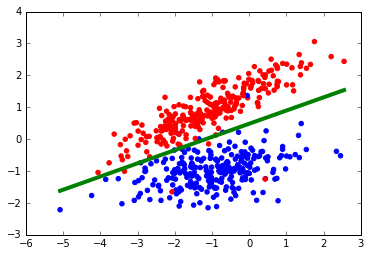

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e5).fit(Xc, yc)
xs = np.linspace(Xc[:, 0].min(), Xc[:, 0].max(), 100)
ys = -lr.intercept_ / lr.coef_[0, 1] - xs * lr.coef_[0, 0] / lr.coef_[0, 1]
mask = (ys > Xc[:, 1].min()) & (ys < Xc[:, 1].max())
xs, ys = xs[mask], ys[mask]
plt.scatter(Xc[:, 0], Xc[:, 1], color=np.array(['r', 'b'])[yc])
plt.plot(xs, ys, 'g', lw=4)

In [1]:
# Download digits if not provided
import os, cPickle, gzip
if not os.path.exists('mnist.pkl'):
    
    if os.path.exists('mnist.pkl.gz'):
        mnist = cPickle.load(gzip.open('mnist.pkl.gz'))
    else:
        print('Downloading MNIST')
        import urllib2
        mnist_file = urllib2.urlopen("http://deeplearning.net/data/mnist/mnist.pkl.gz")
        out = open('mnist.pkl.gz', 'wb')
        out.write(mnist_file.read())
        out.close()
        mnist = cPickle.load(gzip.open('mnist.pkl.gz'))
        print('done')
else:
    mnist = cPickle.load(open(mnist.pkl))

(Xtrain, ytrain), (Xval, yval), (Xtest, ytest) = mnist

[[5 0 4 1 9 2 1 3 1 4]
 [3 5 3 6 1 7 2 8 6 9]
 [4 0 9 1 1 2 4 3 2 7]
 [3 8 6 9 0 5 6 0 7 6]
 [1 8 7 9 3 9 8 5 9 3]
 [3 0 7 4 9 8 0 9 4 1]
 [4 4 6 0 4 5 6 1 0 0]
 [1 7 1 6 3 0 2 1 1 7]
 [9 0 2 6 7 8 3 9 0 4]
 [6 7 4 6 8 0 7 8 3 1]]


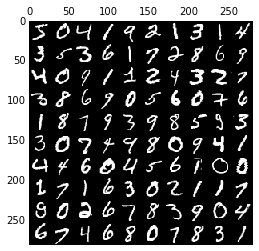

In [33]:
plt.matshow(Xtrain.reshape(-1, 28, 28)[:100].reshape(10, 10, 28, 28).transpose(0, 2, 1, 3).reshape(10 * 28, -1))
plt.gray()
print(ytrain[:100].reshape(10, 10))

## Theano

The same basic numerical entities also exist in Theano and we can use them the same way we use numpy.

In [3]:
import theano
import theano.tensor as T

In [4]:
x = T.fvector()
print x

<TensorType(float32, vector)>


$y = x^2$

In [5]:
y = x ** 2

In [5]:
y

Elemwise{pow,no_inplace}.0

$z = \frac{1}{y + 1} = \frac{1}{x^2 + 1}$

In [6]:
z = 1. / (y + 1)

In [7]:
z

Elemwise{true_div,no_inplace}.0

In [7]:
f = theano.function([x], z)

In [8]:
f(np.array([0.], dtype='float32'))

array([ 1.], dtype=float32)

In [9]:
xs = np.arange(-3., 3., .01, dtype='float32')

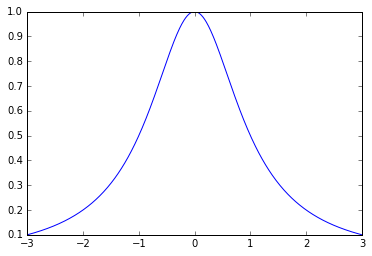

In [10]:
plt.plot(xs, f(xs))

### Logistic Regression

Logistic regression can be seen as a 1-layer neural network with zero hidden units

<img src="http://homepages.gold.ac.uk/nikolaev/perceptr.gif">

It takes the input vector $x\in\mathbb{R}^q$ and calculates a weighted sum of its elements $x_i$ with a set of weights $w_i$. After adding a constant offset $b$, it is sent through a non-linearity $$\sigma(t)=\frac{1}{1 + e^{-t}},$$ called a sigmoid. The formula is as follows:

$$p(x) = \sigma\left(b + \sum_{i=1}^qx_iw_i\right)$$

Using vector notation, we can write this as $$p(x) = \sigma(b + x^Tw)$$

For practical reasons, we would like to do this for many samples at once, so we stack them as lines of a matrix

$$X = \left(\begin{array}{c} {x^1}^T\\\vdots\\{x^n}^T\end{array}\right) = \left(\begin{array}{ccc}x^1_1 & \dots & x^1_q\\
\vdots & \dots & \vdots\\x^n_1 & \dots & x^n_q\end{array}\right)$$

With this representation of many samples, we can write

$$p(X) = \sigma(b + Xw)$$

So let's code it:
- the input vector $x$ will be a placeholder variable as shown above
- the weights and the bias actually need to be stored somewhere, so we will use variables that can store values called *shared* variables

In [11]:
n = 2

X = T.fmatrix()
b = theano.shared(np.zeros((1,), dtype='float32'))
b = theano.shared(np.cast['float32'](0))
w = theano.shared(np.random.randn(n).astype('float32'))
y = T.ivector()

def sigmoid(t):
    return 1. / (1. + T.exp(-t))

In [12]:
p = sigmoid(X.dot(w) + b)

In [14]:
p

Elemwise{true_div,no_inplace}.0

Let's take a look at what `p` would do to our classification data. For this, we need to create a function as above

In [13]:
f_prob = theano.function([X], p)

We make a grid of values in order to be able to show where our function puts which probability

In [17]:
magn = 20
xmin, xmax, ymin, ymax = box = [Xc[:, 0].min(), Xc[:, 0].max(), Xc[:, 1].min(), Xc[:, 1].max()]
grid = np.mgrid[xmin:xmax:magn * 1j, ymin:ymax:magn * 1j].astype('float32')
grid_points = grid.reshape(2, -1).T

Using this grid, we evaluate our function

In [18]:
probs = f_prob(grid_points)
prob_image = probs.reshape(grid.shape[1:])

And then we plot it, including the 0.5 probability decision boundary

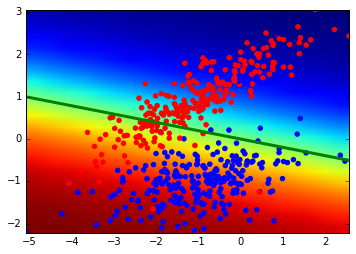

In [19]:
plt.scatter(Xc[:, 0], Xc[:, 1], color=np.array(['r', 'b'])[yc])
xs = np.linspace(xmin, xmax, 100)
coef = w.get_value()
intercept = b.get_value()
ys = -intercept / coef[1] - xs * coef[0] / coef[1]
plt.plot(xs, ys, 'g', lw=3)
plt.jet()
plt.imshow(prob_image.T, extent=box, zorder=0, origin='lower')

The classification is necessarily wrong, since we chose random values for the decision boundary. Now we need to find a way of choosing this boundary correctly. We will do it by optimizing a criterion, which is to maximize the joint probability of classifying all our data points correctly.

Given the datapoint/class couples $(x_i, y_i)$, with $y_i\in\{0, 1\}$, the outputs of the sigmoids $p(x_i)$ will be taken as probabilities of the datapoint having label $1$. Conversely, $1 - p(x_i)$ will be taken as the probability of $x_i$ having label 0.

So, for any given data point, the probability of being classified correctly is 
$$r(x_i, y_i) = \left\{\begin{array}{cl}p(x_i) & \textrm{if } y_i = 1\\(1 - p(x_i)) & \textrm{if } y_i = 0\end{array}\right.$$

With a little trick, we can write this concisely as
$$r(x_i, y_i) = p(x_i)^{y_i}(1 - p(xi))^{(1 - y_i)}$$

Now, the probability of classifying all data points correctly is, assuming their statistical independence:

$$P = \prod_{i=1}^n r(x_i, y_i)$$

We would like to have this value be as close to 1 as possible. However, since most probabilities are less than 1 and we are multiplying very many of them together, the value of $P$ will shrink towards 0 very fast and be almost indistiguishable from it. To tease things apart, to be able to compare and not immediately have numerical errors, we choose to optimize $\log P$, called the loglikelihood. For very small values of $P$ it will become strongly negative, but will use the full range of the negative reals to tease apart very small probabilities.

We can now write the following due to the properties of the log:
$$-\mathcal L = \log P = \log\prod_i r(x_i, y_i) = \sum_i\log r(x_i, y_i)$$

Further refining we obtain
$$\mathcal L =-\log P = -\sum_i\log \left(p(x_i)^{y_i}(1 - p(xi))^{(1 - y_i)}\right)=-\sum_i \left(y_i\log p(x_i) + (1 - y_i)\log(1 - p(x_i))\right)$$

The latter is a formula we can easily write in Theano

In [20]:
L = -(p.dot(y) + (1 - p).dot(1 - y)).mean()

But how do we now optimize it to get a better decision boundary? The answer is: step by step. If we move the weights and the bias in the right direction little by little, then $\mathcal L$ will converge towards a minimum. What is the right direction? We can calculate the gradient for that

In [21]:
grad_w, grad_b = T.grad(L, wrt=[w, b])

Using the gradients, we can then update the weights by a small increment in that direction. The size of the increment is called *learning rate*

In [22]:
learning_rate = 0.1
updates = [(w, w - learning_rate * grad_w), (b, b - learning_rate * grad_b)]

Theano belongs to the functional programming paradigm. However, at some point, assigning values to variables, e.g. updating weights, becomes necessary. These updates happen at function evaluation time if we ask for it.

In [23]:
f_train = theano.function([X, y], L, updates=updates)
f_eval = theano.function([X, y], [L, (T.eq((p > 0.5), y)).mean()])

/home/ubuntu/venv/src/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


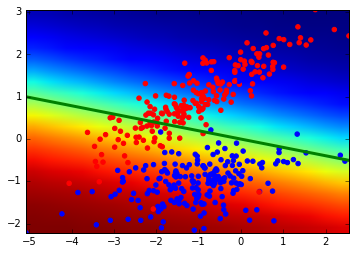

In [24]:
from sklearn.cross_validation import train_test_split
Xctrain, Xctest, yctrain, yctest = train_test_split(Xc, yc, test_size=100)
Xctrain, Xctest = map(np.float32, [Xctrain, Xctest])
yctrain, yctest = map(np.int32, [yctrain, yctest])

plt.scatter(Xctrain[:, 0], Xctrain[:, 1], color=np.array(['r', 'b'])[yctrain])
plt.plot(xs, ys, 'g', lw=3)
plt.imshow(prob_image.T, extent=box, zorder=0, origin='lower')

Now let's train it and keep track of some values

In [29]:
block_size = 10
n_epochs = 20

all_train_errors = []
train_L = []
train_accuracy = []
test_L = []
test_accuracy = []

batch_counter = 0
epoch_counter = []

for epoch in range(n_epochs):
    for block in range(0, len(Xctrain), block_size):
        batch_counter += 1
        all_train_errors.append(f_train(Xctrain[block:block + block_size],
                                        yctrain[block:block + block_size]))
    epoch_counter.append(batch_counter)
    l, a = f_eval(Xctest, yctest)
    test_L.append(l)
    test_accuracy.append(a)
    l, a = f_eval(Xctrain, yctrain)
    train_L.append(l)
    train_accuracy.append(a)

In [30]:
len(epoch_counter)

20

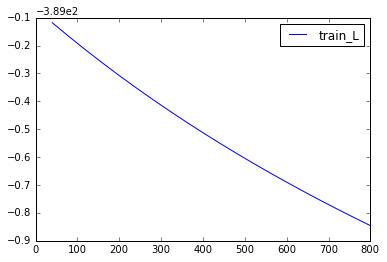

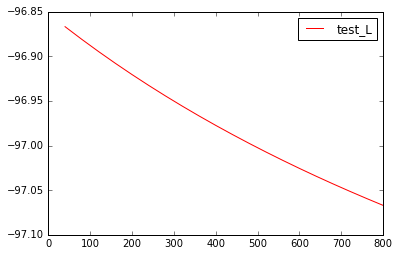

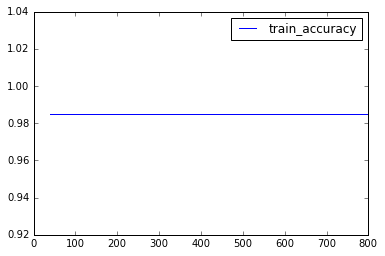

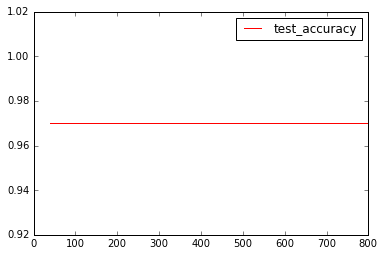

In [35]:
plt.figure()
plt.plot(epoch_counter, train_L, 'b', label='train_L')
plt.legend()
plt.figure()
plt.plot(epoch_counter, test_L, 'r', label='test_L')
plt.legend()

plt.figure()
plt.plot(epoch_counter, train_accuracy, 'b', label='train_accuracy')
plt.legend()
plt.figure()
plt.plot(epoch_counter, test_accuracy, 'r', label='test_accuracy')
plt.legend()


Let us take a look at the change

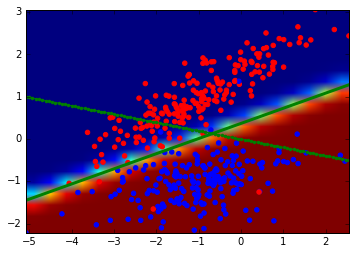

In [32]:
probs = f_prob(grid_points)
prob_image = probs.reshape(grid.shape[1:])
plt.scatter(Xctrain[:, 0], Xctrain[:, 1], color=np.array(['r', 'b'])[yctrain])
plt.plot(xs, ys, 'g.-', lw=1)
coef = w.get_value()
intercept = b.get_value()
ys = -intercept / coef[1] - xs * coef[0] / coef[1]
plt.plot(xs, ys, 'g', lw=3)
plt.imshow(prob_image.T, extent=box, zorder=0, origin='lower')

### Logistic Regression for digits

Now we move on to digits, applying a multiclass logistic regression in essentially the same way

In [58]:
import os
os.environ['THEANO_FLAGS'] = "device='cpu'"

import theano
import theano.tensor as T
import numpy as np

print theano.config.device

rng = np.random.RandomState(42)

W = theano.shared(rng.randn(784, 10).astype('float32'))
b = theano.shared(np.zeros((10,), dtype='float32'))

X = T.fmatrix()
y = T.ivector()

p = T.nnet.softmax(X.dot(W) + b)

L = -T.log(p[T.arange(y.shape[0]), y]).mean() + .001 * (W ** 2).sum()
grad_W, grad_b = T.grad(L, wrt=[W, b])


cpu


In [59]:
learning_rate = 0.1
batch_size = 128

ytrain = ytrain.astype('int32')
yval = yval.astype('int32')
ytest = ytest.astype('int32')

Xstrain, ystrain = theano.shared(Xtrain), theano.shared(ytrain)
i = T.lscalar()
#r = T.arange(i, i + batch_size)

updates = [(W, W - learning_rate * grad_W), (b, b - learning_rate * grad_b)]
givens = {X: Xstrain[i * batch_size:(i + 1) * batch_size], y: ystrain[i * batch_size:(i + 1) * batch_size]}

f_train = theano.function([i], L, givens=givens, updates=updates)
f_val = theano.function([X, y], [L, T.eq(p.argmax(axis=1), y).mean()])

In [60]:
import sys
n_epochs = 100

all_train_errors = []
train_L = []
train_accuracy = []
val_L = []
val_accuracy = []

batch_counter = 0
epoch_counter = 0


for epoch in range(n_epochs):
    sys.stdout.write('\r')
    sys.stdout.write('epoch {}'.format(epoch))
    sys.stdout.flush()
    for batch in range(0, Xtrain.shape[0], batch_size):
        all_train_errors.append(f_train(batch))
    l, a = f_val(Xval, yval)
    val_L.append(l)
    val_accuracy.append(a)
    l, a = f_val(Xtrain, ytrain)
    train_L.append(l)
    train_accuracy.append(a)


epoch 99

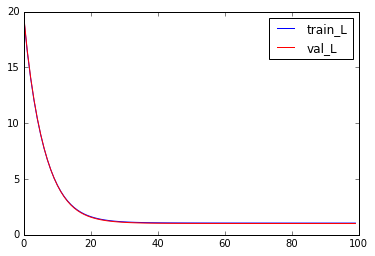

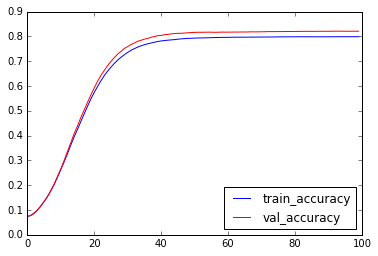

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(train_L, 'b', label='train_L')
plt.plot(val_L, 'r', label='val_L')
plt.legend()
plt.figure()
plt.plot(train_accuracy, 'b', label='train_accuracy')
plt.plot(val_accuracy, 'r', label='val_accuracy')
plt.legend(loc='lower right')

## Multilayer networks

